# import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from helpers import parse_variables, get_risk_level, map_to_color

In [6]:
files_to_analyze = [f for f in os.listdir(f"data/results") if f.startswith('complete')]
files_to_analyze = [f for f in files_to_analyze if f.endswith('seconds.pkl')]


In [29]:
files_computing_time = [f for f in os.listdir(f"data/results") if f.startswith('complete')]
files_computing_time = [f for f in files_computing_time if f.endswith('computingtimes.pkl')]

In [30]:
files_computing_time

['complete_geno_G100_L100_c50_k4_M0.5_HWE1_computingtimes.pkl',
 'complete_geno_G100_L100_c50_k8_M0.5_HWE1_computingtimes.pkl',
 'complete_geno_G100_L100_c50_k4_M0.01_HWE1_computingtimes.pkl',
 'complete_geno_G100_L100_c50_k8_M0.01_HWE1_computingtimes.pkl']

In [8]:
change_name_risks = {
    "no_risk": "no environmental risk",
    "NW_risk": "Smooth linear North-West environmental risk",
    "N_risk" : "Smooth linear North environmental risk",
    "blob_risk": "Localised big blob risk",
    "center_risk": "Localised big central risk",
    "big_square_risk": "big square risk",
    "square_risk" : "Tiny square risk",
    'hi_square_risk' : "Tiny square risk",
    "hi_gauss_blob_risk": "Global Gaussian Risk",
    "two_square_risk": "Two tiny risks",
    "gauss_blob_risk" : "Gaussian Risk",
    "three_square_risk": "Three localized Risks",
    "mid_mid_square_risk": "Mid square risk"
}
change_name_tools = {
    '-logP_no_corr':'no correction',
    '-logP_best_corr': 'best correction',
    '-logP_true_pop': 'x/y axis of population grid',
    '-logP_abyss_via_true_pops': 'counted p2, 2pq and q2',
    '-logP_abyss_pq2pq_via_esti_pops': 'estimated p2, 2pq and q2',
    '-logP_combined': "combined Abyss estimation and PC'",
    '-logP_PCs': 'PCs'
}

In [22]:
file.split("_geno_")[1].split('_total_')[0]

'G100_L100_c50_k4_M0.01_HWE1'

In [10]:
test_dfs = []
for file in files_to_analyze:
    path_file = f"data/results/{file}"
    total_elapsed_time = float(file.split('_total_')[1].split('seconds')[0])
    G = int(file.split('G')[1].split('_')[0])
    L = int(file.split('L')[1].split('_')[0])
    c = int(file.split('_c')[1].split('_')[0])
    k = int(file.split('k')[1].split('_')[0])
    M = float(file.split('M')[1].split('_')[0])
    hwe = int(file.split('HWE')[1].split('_')[0])
    performances = pd.read_pickle(path_file)
    for col in list(performances.columns)[0:-1]:
        test_df = pd.DataFrame()
        test_df['perf'] = performances[col]
        test_df['risk'] = col.split('_noise_')[0].split('risk_')[1]
        test_df['tool'] = performances['tools']
        test_df['noise on phenotype'] = col.split('_noise_')[1].split('_')[0]
        test_df['ratio'] = col.split('_ratioeffect_')[1]
        test_df['G'] = G
        test_df['L'] = L
        test_df['c'] = c
        test_df['k'] = k
        test_df['M'] = M
        test_df['HWE'] = hwe
        test_df['computing time'] = total_elapsed_time
        test_dfs.append(test_df)

In [11]:
result = pd.concat(test_dfs, ignore_index=True)

In [12]:
import pandas as pd

# Assuming df is your DataFrame
# Replace values in the 'risk' column
result['risk'] = result['risk'].replace(change_name_risks)

# Replace values in the 'tools' column
result['tool'] = result['tool'].replace(change_name_tools)

# Now df will have the updated values in the 'risk' and 'tools' columns


In [13]:
result = result[result['tool'] != 'expected_logP']

In [14]:
result['tool'].unique()

array(['no correction', 'best correction', 'x/y axis of population grid',
       'counted p2, 2pq and q2', 'estimated p2, 2pq and q2',
       "combined Abyss estimation and PC'", 'PCs'], dtype=object)

In [15]:
result

,perf,risk,tool,noise on phenotype,ratio,G,L,c,k,M,HWE,computing time
0,2.677487e-16,no environmental risk,no correction,0.1,0,100,100,50,4,0.50,1,1558.227
1,0.000000e+00,no environmental risk,best correction,0.1,0,100,100,50,4,0.50,1,1558.227
2,5.815522e-03,no environmental risk,x/y axis of population grid,0.1,0,100,100,50,4,0.50,1,1558.227
3,5.466244e-03,no environmental risk,"counted p2, 2pq and q2",0.1,0,100,100,50,4,0.50,1,1558.227
4,6.310254e-03,no environmental risk,"estimated p2, 2pq and q2",0.1,0,100,100,50,4,0.50,1,1558.227
...,...,...,...,...,...,...,...,...,...,...,...,...
826,1.142989e-02,no environmental risk,x/y axis of population grid,0.5,1,100,100,50,4,0.01,1,1046.178
827,4.817402e-02,no environmental risk,"counted p2, 2pq and q2",0.5,1,100,100,50,4,0.01,1,1046.178
828,4.882497e-02,no environmental risk,"estimated p2, 2pq and q2",0.5,1,100,100,50,4,0.01,1,1046.178
829,4.852017e-02,no environmental risk,combined Abyss estimation and PC',0.5,1,100,100,50,4,0.01,1,1046.178


In [16]:
def sorting_df(df, to_sort, sort_by):
    mean_perf = df.groupby(to_sort)[sort_by].mean()
    sorted_list = mean_perf.sort_values(ascending=False).index.tolist()
    return sorted_list

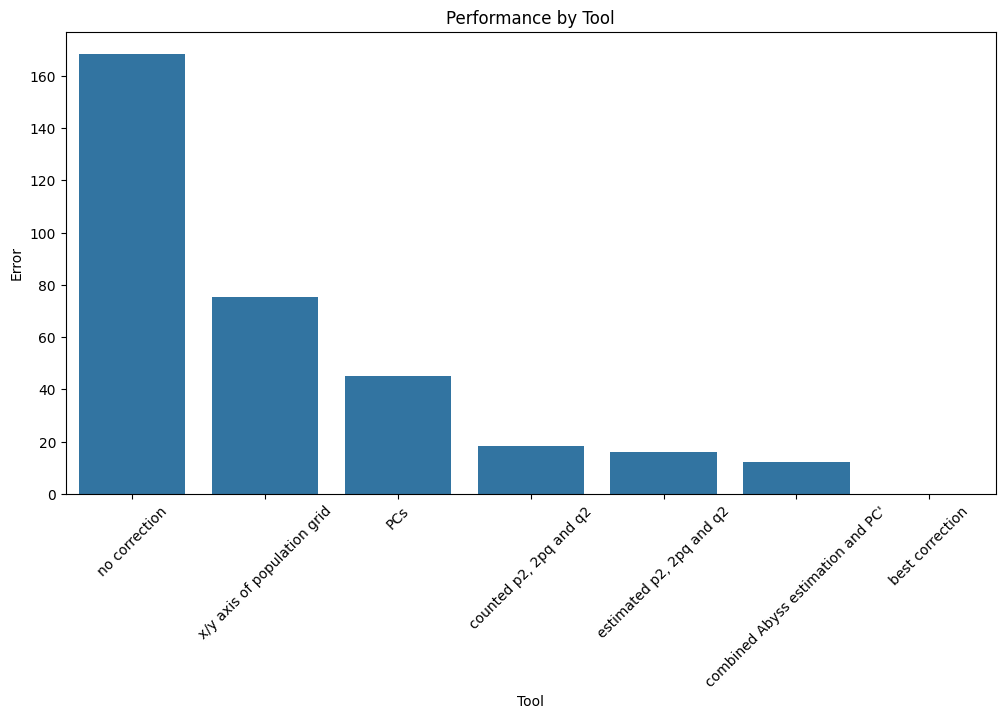

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = result.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, errorbar=None, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

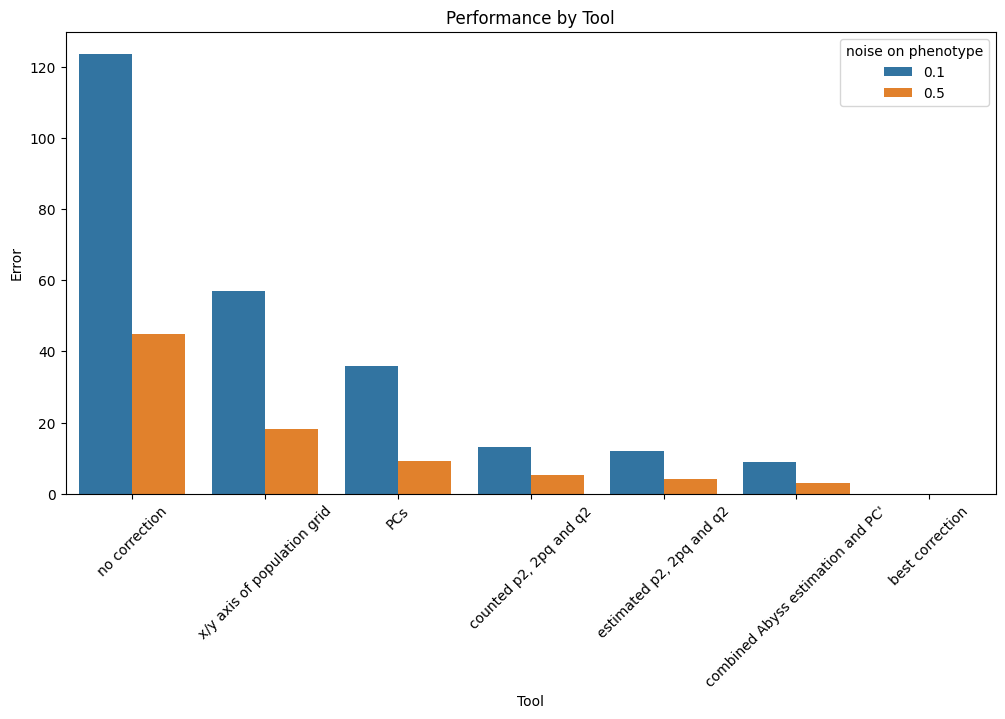

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = result.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, errorbar=None, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'noise on phenotype',hue_order=sorting_df(to_use, 'noise on phenotype', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

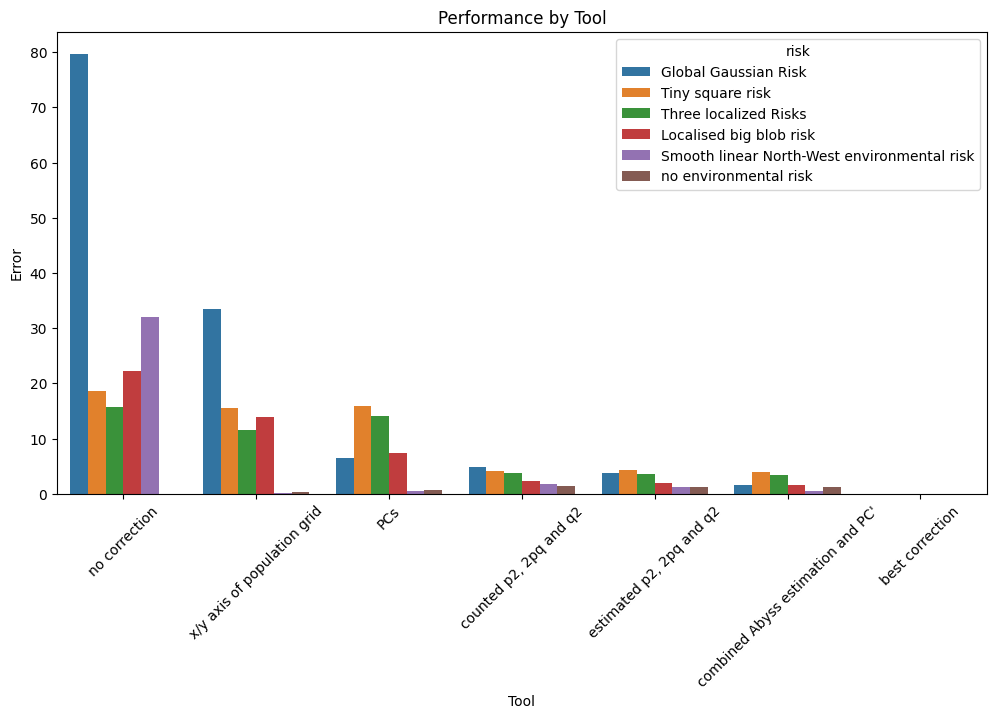

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = result.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, errorbar=None, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'risk',hue_order=sorting_df(to_use, 'risk', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

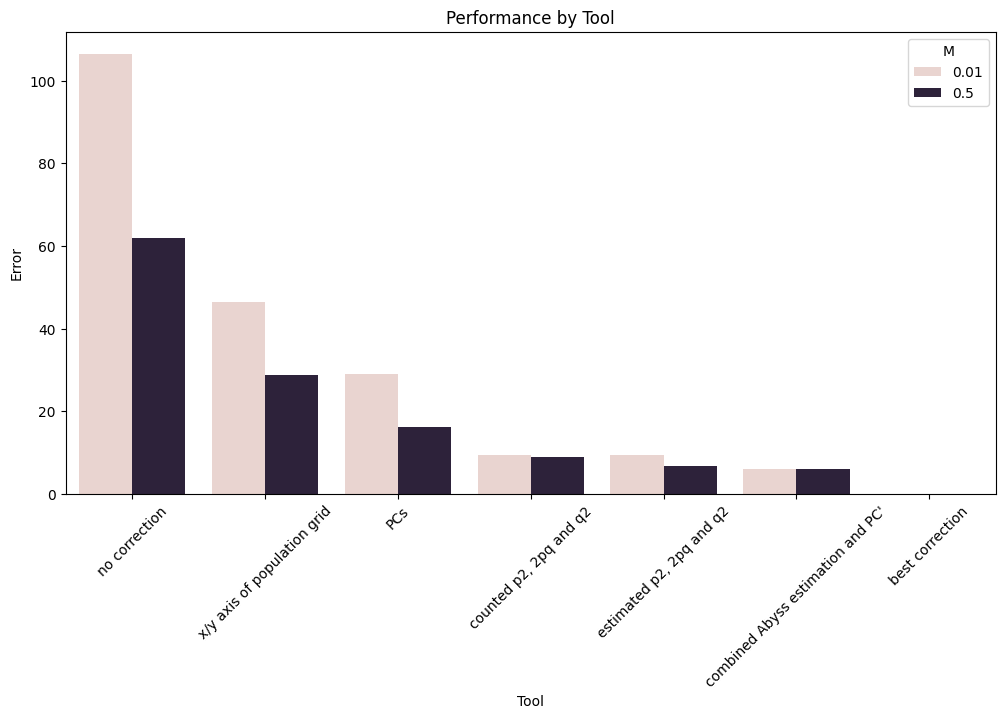

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = result.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, errorbar=None, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'M',hue_order=sorting_df(to_use, 'k', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()